In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 32kB/s 
     |████████████████████████████████| 450kB 37.9MB/s 
     |████████████████████████████████| 3.9MB 48.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=6c6524eecc4be76585e5fc9a04f65bac79db13851f268ea312d6baa21fddce59
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv("GOOGL.csv",date_parser = True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
1,2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2,2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
3,2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


In [4]:
data_training = data[data['Date'] < '2019-01-01']
data_training.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3612,2018-12-24,984.320007,1012.119995,977.659973,984.669983,984.669983,1818000
3613,2018-12-26,997.989990,1048.449951,992.650024,1047.849976,1047.849976,2315900
3614,2018-12-27,1026.199951,1053.339966,1007.000000,1052.900024,1052.900024,2299800
3615,2018-12-28,1059.500000,1064.229980,1042.000000,1046.680054,1046.680054,1719900
3616,2018-12-31,1057.829956,1062.989990,1033.040039,1044.959961,1044.959961,1655500


In [5]:
data_testing = data[data['Date'] >= '2019-01-01']
data_testing.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1027.199951,1060.790039,1025.280029,1054.680054,1054.680054,1593400
3618,2019-01-03,1050.670044,1066.260010,1022.369995,1025.469971,1025.469971,2098000
3619,2019-01-04,1042.560059,1080.000000,1036.859985,1078.069946,1078.069946,2301100
3620,2019-01-07,1080.969971,1082.699951,1062.640015,1075.920044,1075.920044,2372300
3621,2019-01-08,1086.000000,1093.349976,1068.349976,1085.369995,1085.369995,1770700


In [6]:
training_data = data_training.drop(['Date','Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,50.050049,52.082081,48.028027,50.220219,44659000
1,50.555557,54.594593,50.300301,54.209209,22834300
2,55.430431,56.796795,54.579578,54.754753,18256100
3,55.675674,55.855854,51.836838,52.487488,15247300
4,52.532532,54.054054,51.991993,53.053055,9188600


In [7]:
scalar = MinMaxScaler()
training_data = scalar.fit_transform(training_data)
training_data

array([[3.27076291e-04, 9.36027567e-04, 0.00000000e+00, 1.33688677e-04,
        5.40709661e-01],
       [7.34916593e-04, 2.96139917e-03, 1.87022750e-03, 3.36247683e-03,
        2.73350035e-01],
       [4.66793067e-03, 4.73662548e-03, 5.39234743e-03, 3.80405377e-03,
        2.17265605e-01],
       ...,
       [7.87877956e-01, 8.08064229e-01, 7.89295551e-01, 8.11727769e-01,
        2.17957749e-02],
       [8.14744202e-01, 8.16842824e-01, 8.18102800e-01, 8.06693170e-01,
        1.46918125e-02],
       [8.13396822e-01, 8.15843250e-01, 8.10728176e-01, 8.05300884e-01,
        1.39028917e-02]])

In [0]:
X_train = []
y_train = []

In [0]:
for i in range(60,training_data.shape[0]):
  X_train.append(training_data[i-60:i])
  y_train.append(training_data[i,0])

In [0]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [11]:
X_train.shape,y_train.shape

((3557, 60, 5), (3557,))

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM , Dropout

In [0]:
regression = Sequential()
regression.add(LSTM(units = 60, activation = 'relu', return_sequences = True,input_shape=(X_train.shape[1],5)))
regression.add(Dropout(0.1))
regression.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regression.add(Dropout(0.2))
regression.add(LSTM(units = 100, activation = 'relu', return_sequences = True))
regression.add(Dropout(0.2))
regression.add(LSTM(units = 120, activation = 'relu'))
regression.add(Dropout(0.2))
regression.add(Dense(units = 1))

In [14]:
regression.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 100)           72400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               1

In [0]:
regression.compile(optimizer='adam',loss='mean_squared_error')

In [16]:
regression.fit(X_train,y_train,epochs = 50, batch_size = 32)

Train on 3557 samples
Epoch 1/50
3557/3557 [==============================] - 23s 7ms/sample - loss: 0.0094
Epoch 2/50
3557/3557 [==============================] - 20s 6ms/sample - loss: 0.0019
Epoch 3/50
3557/3557 [==============================] - 19s 5ms/sample - loss: 0.0021
Epoch 4/50
3557/3557 [==============================] - 20s 6ms/sample - loss: 0.0020
Epoch 5/50
3557/3557 [==============================] - 19s 5ms/sample - loss: 0.0015
Epoch 6/50
3557/3557 [==============================] - 19s 5ms/sample - loss: 0.0014
Epoch 7/50
3557/3557 [==============================] - 19s 5ms/sample - loss: 0.0016
Epoch 8/50
3557/3557 [==============================] - 20s 5ms/sample - loss: 0.0016
Epoch 9/50
3557/3557 [==============================] - 20s 6ms/sample - loss: 0.0013
Epoch 10/50
3557/3557 [==============================] - 19s 5ms/sample - loss: 0.0013
Epoch 11/50
3557/3557 [==============================] - 19s 5ms/sample - loss: 0.0013
Epoch 12/50
3557/3557 [=======

In [0]:
past_60_days = data_training.tail(60)

In [18]:
df = past_60_days.append(data_testing)
df = df.drop(['Date','Adj Close'],axis = 1)
df

,Open,High,Low,Close,Volume
3557,1205.030029,1205.900024,1163.849976,1177.069946,2328800
3558,1176.000000,1182.000000,1154.319946,1167.829956,1592600
3559,1160.000000,1175.859985,1135.400024,1155.920044,2309500
3560,1151.310059,1161.550049,1144.170044,1145.170044,1684500
3561,1136.400024,1137.020020,1091.510010,1092.160034,2949000
...,...,...,...,...,...
3943,1269.890015,1276.819946,1256.439941,1261.150024,1764600
3944,1242.709961,1250.000000,1205.000000,1212.160034,2482400
3945,1241.109985,1279.880005,1237.199951,1258.410034,2315800
3946,1265.739990,1288.150024,1260.530029,1271.170044,1710100


In [19]:
inputs = scalar.transform(df)
inputs

array([[0.93215681, 0.93104506, 0.91839316, 0.91223401, 0.02215103],
       [0.90873558, 0.91177891, 0.91054933, 0.90475493, 0.01313235],
       [0.8958269 , 0.90682936, 0.89497702, 0.89511475, 0.0219146 ],
       ...,
       [0.96126586, 0.99068137, 0.9787649 , 0.9780727 , 0.02199178],
       [0.98113718, 0.99734795, 0.99796706, 0.98840098, 0.01457176],
       [0.97247223, 0.98893207, 0.98436178, 0.9927961 , 0.01653181]])

In [0]:
X_test = []
y_test = []

In [21]:
for i in range(60,inputs.shape[0]):
  X_test.append(inputs[i-60:i])
  y_test.append(inputs[i,0])
X_test,y_test = np.array(X_test),np.array(y_test)
X_test.shape,y_test.shape

((331, 60, 5), (331,))

In [0]:
y_pred = regression.predict(X_test)

In [23]:
scale = 1/scalar.scale_[0]
scale

1239.475349

In [0]:
y_pred *= scale
y_test *= scale

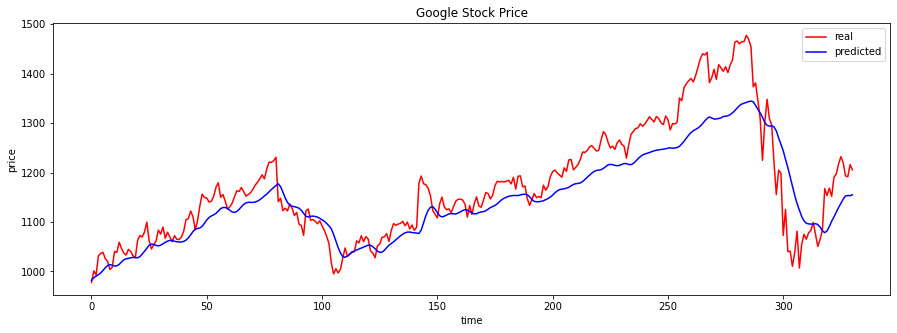

In [25]:
plt.figure(figsize = (15,5))
plt.plot(y_test,color = 'red',label = 'real')
plt.plot(y_pred,color = 'blue',label = 'predicted')
plt.xlabel('time')
plt.ylabel('price')
plt.title("Google Stock Price")
plt.legend()
plt.show()